<a href="https://colab.research.google.com/github/ASingh-AGH/AI_Collab/blob/main/DLMIA%20Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AGH - Deep Learning in Medical Image Analysis I

Author: Marek Wodziński

Contact: wodzinski@agh.edu.pl

You are allowed to use these materials for all purposes as long as the credit is given.


# Laboratory 4 - Neural Netoworks Training - Supervised

The goal of the Laboratory 4 is to:
<ul>
  <li> Familarize yourself with the gradient descent algorithm.
  <li> Get familiar with the neural network training process.
  <li> Train a neural network for the classification of brain tumors in the MRI images.
  <li> Understand the training hyperparameters: batch size, number of epochs, learning rate.
</ul>

You are going to: (i) implement the gradient descent algorithm in PyTorch, (ii) implement a simple convolutional network architecture, (iii) train the neural network using the supervised strategy (for image classification).

### Part I - Gradient Descent

The first part of the laboratory is not directly connected with the neural network training process but it is useful to understand the general concept.

You will start by implementing a simple version of the gradient descent algorithm. You can build the intuition by reading: 

http://mlwiki.org/index.php/Gradient_Descent

The gradient algorithm is the predecessor of the state-of-the-art optimization methods used to train the deep neural network like SGD or Adam - the methods you will use in the next parts of the laboratory. It is a first order gradient-based optimization method.

Let's start by generating a simple function. Your task will be to find the minimum of the function by the gradient descent (using PyTorch).

In [1]:
import numpy as np
import torch as tc
import matplotlib.pyplot as plt

# Let f(x, y) = x**2 + y**2
# Let's minimize the function analytically
# Gf(x) = [df(x, y) / dx, df(x, y) / dy] = [2*x, 2*y]
# 2*x = 0
# 2*y = 0
# The minimum is clearly defined (x, y) = (0, 0)
# Now verify this by the gradient descent

In [10]:
# Implement the gradient descent here
def gradient_descent(f, initial_guess, num_iters, learning_rate, echo=False):
  """
  f - function (callable) : function taking N variables as input
  num_iters - int : number of iterations
  initial_guess - Tensor : vector of N variables
  learning_rate - float: the learning rate for the gradient descent update
  echo - bool: whether to print the results during each iteration
  Note: Implement the gradient calculation on your own
  """
  result = np.array(initial_guess) # TODO - intialize the result
  step = 0.001 # Some inner step inside the function to calculate the gradient
  
  for i in range(num_iters):
    gradient = np.zeros_like(result) # TODO - calculate the numerical gradient for each iteration
    
    for j in range(result.size): 
        next = result.copy() 
        next[j] += step 

        prv = result.copy() 
        prv[j] -= step 
        
        gradient[j] += (f(*next) - f(*prv)) / (2*step) 
    
    result = result - learning_rate*gradient # TODO - update the arguments using the gradient descent equation
    if echo: # TODO - print the current result and the function value for this result
      print("Current Result:{}".format(result))
      print("Function at result".format(f(*result)))
  return result

Now let's verify the implementation:

In [11]:
f = lambda x, y: x**2 + y**2
initial_guess = tc.randn(2).type(tc.float32) # Let's start with some two random numbers
num_iters = 50
learning_rate = 0.1
echo = True

result = gradient_descent(f, initial_guess, num_iters, learning_rate, echo)
print(f"Initial arguments: {initial_guess}, Value of the function for the initial arguments: {f(*initial_guess)}")
print(f" current result: {result}, Value of the function at the result: {f(*result)}")

Current Result:[-1.5950966 -0.5852623]
Function at result
Current Result:[-1.2760624  -0.46821135]
Function at result
Current Result:[-1.020838   -0.37457028]
Function at result
Current Result:[-0.8166609 -0.2996572]
Function at result
Current Result:[-0.6533308  -0.23972653]
Function at result
Current Result:[-0.52266634 -0.19178112]
Function at result
Current Result:[-0.41813442 -0.15342481]
Function at result
Current Result:[-0.3345086  -0.12273979]
Function at result
Current Result:[-0.26760775 -0.09819178]
Function at result
Current Result:[-0.21408689 -0.07855339]
Function at result
Current Result:[-0.17126942 -0.06284267]
Function at result
Current Result:[-0.13701546 -0.05027414]
Function at result
Current Result:[-0.10961232 -0.04021933]
Function at result
Current Result:[-0.08768981 -0.03217547]
Function at result
Current Result:[-0.07015181 -0.02574039]
Function at result
Current Result:[-0.05612142 -0.02059231]
Function at result
Current Result:[-0.04489716 -0.01647384]
Fun

You can observe that the function became a bit unstable during the last iterations. This is connected with the learning rate: (i) if the learning rate is too high the function can become unstable, (ii) if the learning rate is too low the time required for optimization will be longer.

Verify the effect of the learning rate:

In [12]:
initial_guess = tc.randn(2).type(tc.float32) # Let's start with some two random numbers
num_iters = 50
learning_rate_low = 0.01
learning_rate_medium = 0.1
learning_rate_high =  10
echo = True

print()
result_lr_low = gradient_descent(f, initial_guess, num_iters, learning_rate_low, echo)
print()
print(f"Result: {result}, Value of the function at the result: {f(*result_lr_low)}")

print()
result_lr_medium = gradient_descent(f, initial_guess, num_iters, learning_rate_medium, echo)
print()
print(f"Result: {result}, Value of the function at the result: {f(*result_lr_medium)}")

print()
result_lr_high = gradient_descent(f, initial_guess, num_iters, learning_rate_high, echo)
print()
print(f"Result: {result}, Value of the function at the result: {f(*result_lr_high)}")


Current Result:[-0.8311296  1.3716552]
Function at result
Current Result:[-0.81450725  1.3442209 ]
Function at result
Current Result:[-0.7982173  1.3173352]
Function at result
Current Result:[-0.78225315  1.2909873 ]
Function at result
Current Result:[-0.7666083  1.2651663]
Function at result
Current Result:[-0.7512763  1.2398617]
Function at result
Current Result:[-0.736251   1.2150633]
Function at result
Current Result:[-0.72152615  1.190761  ]
Function at result
Current Result:[-0.7070958  1.1669446]
Function at result
Current Result:[-0.69295406  1.1436046 ]
Function at result
Current Result:[-0.67909515  1.1207315 ]
Function at result
Current Result:[-0.6655134  1.0983158]
Function at result
Current Result:[-0.6522033  1.0763485]
Function at result
Current Result:[-0.63915944  1.0548205 ]
Function at result
Current Result:[-0.6263764  1.0337231]
Function at result
Current Result:[-0.61384904  1.0130477 ]
Function at result
Current Result:[-0.6015722  0.9927858]
Function at result

You can observe that for the low learning rate the function requires more iterations to converge, the medium learning rate is more or less acceptable, while the high learning rate led to an unstability during the training process.

Next, let's implement the gradient descent again, however, this time use the PyTorch Autograd to calculate the gradient.

You may find useful to first read:

https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

In [17]:
# Implement the gradient descent here
def gradient_descent_autograd(f, initial_guess, num_iters, learning_rate, echo=False):
  """
  f - function (callable) :of N variables
  num_iters - int : number of iterations
  initial_guess - Tensor : vector of N variables
  learning_rate - float: the learning rate for gradient descent update
  echo - bool: whether to print the results during each iteration
  Note: Implement the gradient calculation using PyTorch Autograd
  """
  result = initial_guess.requires_grad_(True)
  for i in range(num_iters):
        # calculate the gradient using Autograd
    gradient = tc.autograd.grad(f(*result), result, create_graph=True)[0]
        # update the result using the gradient descent equation
    result = result - learning_rate * gradient
    if echo:
      print("Iteration:{}".format(i+1))
      print("Current Result:{}".format(result))
      print("Function at result".format(f(*result)))
  return result

Verify the correctness. Moreover, compare the running time with the previously implemented function (with echo = False).

In [19]:
import time 

initial_guess = tc.randn(2).type(tc.float32)# Let's start with some two random numbers
num_iters = 50
learning_rate = 0.1
echo = True

result = gradient_descent(f, initial_guess, num_iters, learning_rate, echo)
t1 = time.time()
%timeit result_autograd = gradient_descent_autograd(f, initial_guess, num_iters, learning_rate, echo)
t2 = time.time()
print(f"Initial arguments: {initial_guess}, Value of the function for the initial arguments: {f(*initial_guess)}")
print(f"Result: {result}, Value of the function at the result: {f(*result)}")
print(f"Result Autograd: {result_autograd}, Value of the function at the result: {f(*result_autograd)}")

print("Execution time: ", t2-t1)
# TODO - measure the execution time - note this is a toy problem and the autograd is calculated using GPU

Streaming output truncated to the last 5000 lines.
Iteration:36
Current Result:tensor([ 0.0002, -0.0006], grad_fn=<SubBackward0>)
Function at result
Iteration:37
Current Result:tensor([ 0.0001, -0.0005], grad_fn=<SubBackward0>)
Function at result
Iteration:38
Current Result:tensor([ 0.0001, -0.0004], grad_fn=<SubBackward0>)
Function at result
Iteration:39
Current Result:tensor([ 9.0774e-05, -3.1763e-04], grad_fn=<SubBackward0>)
Function at result
Iteration:40
Current Result:tensor([ 7.2619e-05, -2.5410e-04], grad_fn=<SubBackward0>)
Function at result
Iteration:41
Current Result:tensor([ 5.8095e-05, -2.0328e-04], grad_fn=<SubBackward0>)
Function at result
Iteration:42
Current Result:tensor([ 4.6476e-05, -1.6263e-04], grad_fn=<SubBackward0>)
Function at result
Iteration:43
Current Result:tensor([ 3.7181e-05, -1.3010e-04], grad_fn=<SubBackward0>)
Function at result
Iteration:44
Current Result:tensor([ 2.9745e-05, -1.0408e-04], grad_fn=<SubBackward0>)
Function at result
Iteration:45
Curren

You can see that both the method work. However, the Autograd outputs more accurate results. The reason for this is connected with the fact that Autograd attempts to configure the gradient as accurately as possible (e.g. by choosing a dedicated gradient step). A speed-up compared with the naive gradient approximiation could be observed with more real-like problems (more variables) and using GPUs.

### Part II - Convolutional Neural Network

Let's now implement a simple neural network. Following the knowledge and skills you gained during Laboratory 2.

Implement a neural network with the following architecture:

<ul>
  <li> Conv2D with:
    <ul>
      <li> Input channels: 1
      <li> Output channels: 32
      <li> Kernel size: 3
      <li> Stride : 1
      <li> Padding: 1
    </ul>
  <li> BatchNorm2D
  <li> ReLU activation function
  <li> Conv2D with:
    <ul>
      <li> Input channels: 32
      <li> Output channels: 64
      <li> Kernel size: 3
      <li> Stride : 2
      <li> Padding: 2
    </ul>
  <li> BatchNorm2D
  <li> ReLU activation function
  <li> Conv2D with:
    <ul>
      <li> Input channels: 64
      <li> Output channels: 64
      <li> Kernel size: 3
      <li> Stride : 1
      <li> Padding: 1
    </ul>
  <li> BatchNorm2D
  <li> ReLU activation function
  <li> Conv2D with:
    <ul>
      <li> Input channels: 64
      <li> Output channels: 64
      <li> Kernel size: 3
      <li> Stride : 2
      <li> Padding: 2
    </ul>
  <li> BatchNorm2D
  <li> ReLU activation function
  <li> Conv2D with:
    <ul>
      <li> Input channels: 64
      <li> Output channels: 64
      <li> Kernel size: 3
      <li> Stride : 2
      <li> Padding: 2
    </ul>
  <li> BatchNorm2D
  <li> ReLU activation function
  <li> Conv2D with:
    <ul>
      <li> Input channels: 64
      <li> Output channels: 64
      <li> Kernel size: 3
      <li> Stride : 2
      <li> Padding: 1
    </ul>
  <li> BatchNorm2D
  <li> ReLU activation function
  <li> Adaptive Average Pooling to size (B, 128, 1, 1)
  <li> Linear layer with input size: 64, and output size: 64
  <li> ReLU activation function
  <li> Linear layer with input size: 64 and output size: 64
  <li> ReLU activation function
  <li> Linear layer with input size: 64 and output size: 4
</ul>

In [20]:
class ClassificationNetwork(tc.nn.Module):
    #TODO - implement the neural network architecture
    def __init__(self):
        super(ClassificationNetwork, self).__init__()
        # TODO
        self.linear_relu_stack = tc.nn.Sequential(
          tc.nn.Conv2d(1, 32, 3, stride=1, padding=1),
          tc.nn.BatchNorm2d(32),
          tc.nn.ReLU(),
          tc.nn.Conv2d(32, 64, 3, stride=2, padding=2),
          tc.nn.BatchNorm2d(64),
          tc.nn.ReLU(),
          tc.nn.Conv2d(64, 64, 3, stride=1, padding=1),
          tc.nn.BatchNorm2d(64),
          tc.nn.ReLU(),
          tc.nn.Conv2d(64, 64, 3, stride=2, padding=2),
          tc.nn.BatchNorm2d(64),
          tc.nn.ReLU(),
          tc.nn.Conv2d(64, 64, 3, stride=2, padding=2),
          tc.nn.BatchNorm2d(64),
          tc.nn.ReLU(),
          tc.nn.Conv2d(64, 64, 3, stride=2, padding=1),
          tc.nn.BatchNorm2d(64),
          tc.nn.ReLU(),
          tc.nn.AdaptiveAvgPool2d((1, 1)),
          tc.nn.Flatten(),
          tc.nn.Linear(64, 64),
          tc.nn.ReLU(),
          tc.nn.Linear(64, 64),
          tc.nn.ReLU(),
          tc.nn.Linear(64, 4))

    def forward(self, x):
        # TODO - implement the forward pass
        return self.linear_relu_stack(x)

And generate random input to the verify whether the neural networks processes the input correctly:

In [21]:
from torchsummary import summary
device = "cuda:0"

classification_network = ClassificationNetwork()

batch_size = 4
random_input = tc.randn((batch_size, 1, 224, 224))
random_output = classification_network(random_input)

print(f"Size of the random input: {random_input.size()}")
print(f"Size of the random output: {random_output.size()}")
print("Random output: ")
print(random_output)

print("Network summary: ")
summary(classification_network.to(device), (1, 224, 224))

Size of the random input: torch.Size([4, 1, 224, 224])
Size of the random output: torch.Size([4, 4])
Random output: 
tensor([[-1.5253e-03,  7.9419e-03, -5.3119e-02,  1.8130e-02],
        [ 2.4989e-03,  3.6527e-03, -5.5841e-02,  1.7050e-02],
        [ 8.1621e-04,  1.5947e-02, -5.2858e-02,  2.0832e-02],
        [ 5.8651e-05,  1.1497e-02, -5.4703e-02,  1.9210e-02]],
       grad_fn=<AddmmBackward0>)
Network summary: 
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             320
       BatchNorm2d-2         [-1, 32, 224, 224]              64
              ReLU-3         [-1, 32, 224, 224]               0
            Conv2d-4         [-1, 64, 113, 113]          18,496
       BatchNorm2d-5         [-1, 64, 113, 113]             128
              ReLU-6         [-1, 64, 113, 113]               0
            Conv2d-7         [-1, 64, 113, 113]          36,928
      

### Part III - Dataset, Dataloader

You are going to use the dataset from the Laboratory 3 dedicated to tumor classification in the MRI images. Mount the google drives, create the pathes and copy-paste the dataloader (the extended version) to the cell below:

In [24]:
import os
import pandas as pd
!pip install SimpleITK
import SimpleITK as sitk
import torchvision as tv

# TODO - use the dataloader from the previous laboratory

from google.colab import drive
drive.mount('/content/drive')

input_file = '/content/drive/MyDrive/Colab_Notebooks/Brain_MRI.zip' # Path to the "Brain_MRI.zip"

output_folder = '/content/drive/MyDrive/Colab_Notebooks/lab_3_Brain_MRI' # Path to the folder where you would like to unzip the input ".zip" file

print(f"Input file path: {input_file}")
print(f"Output folder path: {output_folder}")

# !unzip {input_file} -d {output_folder} 
dataset_path = output_folder
training_csv_path = os.path.join(dataset_path, "training.csv")
testing_csv_path = os.path.join(dataset_path, "testing.csv")

training_path = os.path.join(dataset_path, "Training")
testing_path = os.path.join(dataset_path, "Testing")

training_classes = os.listdir(training_path) 
testing_classes = os.listdir(testing_path)

classes = training_classes + testing_classes # TODO list all the available classes
print(f"Available classes: {classes}")
classes_dict = {classes[i]: i for i in range(len(classes))}
print(f"Classes dict: {classes_dict}")

training_cases = []
testing_cases = []

for current_class in classes:
    if current_class in training_classes: 
        path = training_path 
        cases = training_cases 
    else: 
        path = testing_path 
        cases = testing_cases

    for current_case in os.listdir(os.path.join(path, current_class)):
        cases.append([current_case, classes_dict[current_class], current_class])

# TODO - create the dataframes and save them to .csv
testing_frame = pd.DataFrame(testing_cases)
testing_frame.to_csv(testing_csv_path)

training_frame = pd.DataFrame(training_cases)
training_frame.to_csv(training_csv_path)

class BrainDataset(tc.utils.data.Dataset):
    def __init__(self, dataset_path, csv_path, transforms=None, z_norm=False):
        self.dataset_path = dataset_path
        self.csv_path = csv_path
        self.dataset_path = dataset_path
        self.dataframe = pd.read_csv(csv_path) # TODO - read the previously created csv

    def __len__(self):
        return self.dataframe.shape[0]

    def __getitem__(self, idx):

        current_class = self.dataframe.iloc[idx, 3]
        data_path = os.path.join(self.dataset_path, current_class)
        current_image = tv.io.read_image(os.path.join(data_path, self.dataframe.iloc[idx, 1]))
        current_label = f"{current_class}: {self.dataframe.iloc[idx, 2]}"
        current_image = current_image.type(tc.float32)

        def resize(current_image): #resample resolution
          return tv.transforms.Resize((224, 224))(current_image)

        def gray(current_image): #grayscale
          return tv.transforms.Grayscale()(current_image)

        current_image = resize(current_image)
        current_image = gray(current_image)
        normalize = lambda image: (image - tc.min(image)) / (tc.max(image) - tc.min(image))
        current_image = normalize(current_image)
        current_image = current_image.unsqueeze(0)
            
        return current_image, current_label

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive
Input file path: /content/drive/MyDrive/Colab_Notebooks/Brain_MRI.zip
Output folder path: /content/drive/MyDrive/Colab_Notebooks/lab_3_Brain_MRI
Available classes: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor', 'glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
Classes dict: {'glioma_tumor': 4, 'meningioma_tumor': 5, 'no_tumor': 6, 'pituitary_tumor': 7}


Verify whether the data is being loaded correctly:

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


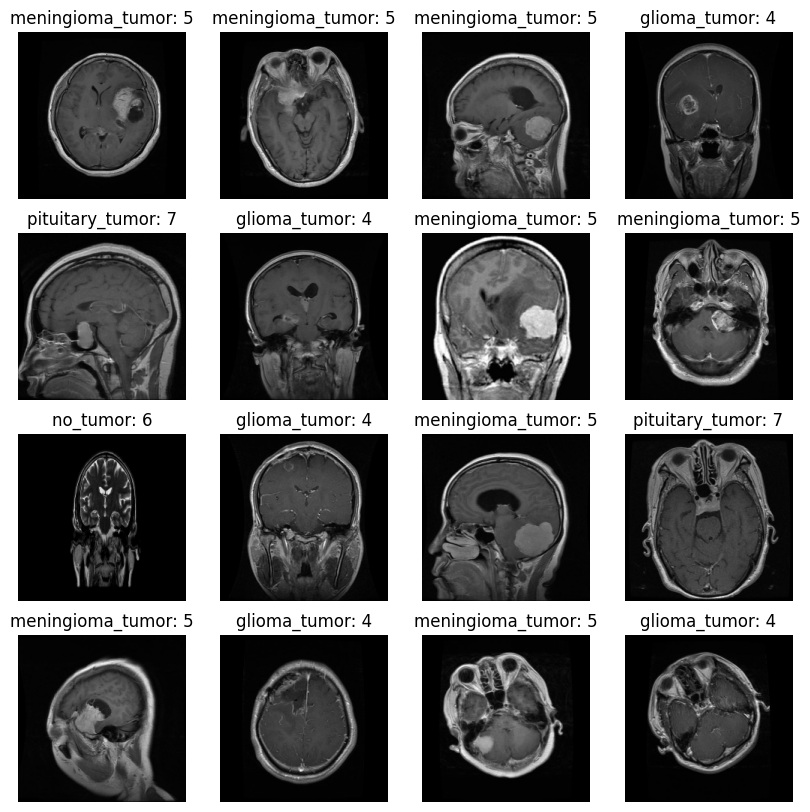

In [28]:
# TODO - create the visualization as below (previous laboratory)
batch_size = 16
shuffle = True
training_dataset = BrainDataset(os.path.join(dataset_path, "Training"),training_csv_path)
training_dataloader = tc.utils.data.DataLoader(training_dataset, batch_size=batch_size, shuffle=shuffle)

figure = plt.figure(figsize=(10, 10))

for images, classes in training_dataloader:
    for i in range(batch_size):
        figure.add_subplot(4, 4, i+1)
        plt.imshow(images[i][0].squeeze(), cmap="gray")
        plt.title(classes[i])
        plt.axis("off")
    break
plt.show()

### Part IV - Network Training

Now it's the time to train the neural network. During this laboratory you are going to do this in a supervised manner. It means that the ground-truth labels will be provided during the training process to guide the network parameters into local minima of the objective function dedicated to image classification.

This time you will analyze the training process in a simplified way by accumulating and visualizing the process using matplotlib. More advanced TensorBoard logging will be the task during the next Laboratory.

Start with creating the training function. 

In [32]:
def training(model, training_dataloader, testing_dataloader, training_params):
  num_epochs = training_params['num_epochs']
  learning_rate = training_params['learning_rate']

  objective_function = tc.nn.CrossEntropyLoss() # TODO: use the cross entropy loss (search for documentation)
  parameters =sum(param.numel() for param in model.parameters()) # TODO: get the model parameters
  optimizer = tc.optim.Adam(model.parameters(), lr=learning_rate)  # TODO: use the Adam optimizer for the model parameters and the defined learning rate
  device = "cuda:0" # You want to use GPU (remember to set the correct run enviroment in the Google Colab settings)

  training_losses = []
  testing_losses = [] # NOTE: in practical applications you should use validation set
  model = model.to(device) # Transfer the network to GPU
  
  print(f"Training dataset size: {len(training_dataloader.dataset)}")
  print(f"Testing dataset size: {len(testing_dataloader.dataset)}")
  for epoch in range(num_epochs):
    print(f"Current epoch: {epoch}")

    training_epoch_loss = 0.0
    model.train()
    for images, classes in training_dataloader:
        # TODO: Transfer the images and classes to GPU
        # TODO: Forward the images through the model
        # TODO: Calculate the objective function 
        # TODO: Backpropagate the gradient
        # TODO: Update the optimizer
        # TODO: Reset the optimizer gradient
        # TODO: Update the epoch loss
        images, classes = images.to(device), classes.to(device)
        optimizer.zero_grad()
        output = model(images) 
        loss = objective_function(output, classes)
        loss.backward()
        optimizer.step()
        training_epoch_loss += loss.item() * images.size(0)



    training_epoch_loss = training_epoch_loss / len(training_dataloader.dataset)
    training_losses.append(training_epoch_loss)
    print(f"Current epoch training loss: {training_epoch_loss}")

    testing_epoch_loss = 0.0
    model.eval()
    for images, classes in testing_dataloader:
      with tc.set_grad_enabled(False):
         images = images.to(device)
         classes = classes.to(device)
         optimizer.zero_grad()
         output = model(images) 
         loss = objective_function(output, classes)
         optimizer.step()
         testing_epoch_loss += loss.item() * images.size(0)

    testing_epoch_loss = testing_epoch_loss / len(testing_dataloader.dataset)
    testing_losses.append(testing_epoch_loss)
    print(f"Current epoch testing loss: {testing_epoch_loss}")

  # Return the trained model and the history of training and testing losses
  return model, training_losses, testing_losses

Now define the training hyperparameters and create the training/testing dataloader (note: during this laboratory you not have the validation dataloader and the testing set is used as the validation dataloader, it will be modified during the next Laboratory):

In [33]:
learning_rate = 0.003
batch_size = 32
num_epochs = 100
shuffle = True
model = ClassificationNetwork()

training_params = {
    'learning_rate': learning_rate,
    'num_epochs': num_epochs,
}

training_dataset = BrainDataset(os.path.join(dataset_path, "Training"), training_csv_path)
training_dataloader = tc.utils.data.DataLoader(training_dataset, batch_size=batch_size, shuffle=shuffle)

testing_dataset = BrainDataset(os.path.join(dataset_path, "Testing"), testing_csv_path)
testing_dataloader = tc.utils.data.DataLoader(testing_dataset, batch_size=batch_size, shuffle=False)

Run the training:

In [34]:
model, training_losses, testing_losses = training(model, training_dataloader, testing_dataloader, training_params)

Training dataset size: 5740
Testing dataset size: 0
Current epoch: 0


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


AttributeError: ignored

And finally visualize the training/validation process by showing the loss during each epoch (as below):

In [ ]:
# TODO: Plot the visualization of the training process as below.
plt.plot(training_losses, label="Training loss")
plt.plot(testing_losses, label="Testing loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
# During next laboratory you will use a better tool: TensorBoard

Do you see any problems? What went wrong? What whould happen after inreasing the number of training epochs?

You have just finished the training of the neural network. The next task is to analyze the obtained results.

### Part V - Result Analysis

In the last part of the Laboratory you are going to analyze the results. First, you are going to show the confusion matrices for the training and testing sets. Then, you will visualize the cases for which the network failed.

Start with creating function responsible for accumulating the results. The function should perform a single pass through a dataloader and accumulate all predicitions, together with the corresponding group truth labels.

In [ ]:
def accumulate_predictions(model, dataloader):
  predictions = []
  targets = []
  device = "cuda:0"
  model.eval()
  with tc.set_grad_enabled(False):
      print(f"Dataset size: {len(dataloader.dataset)}")
      for images, classes in dataloader:
        pass # TODO
  return predictions, targets

training_predictions, training_targets = accumulate_predictions(model, training_dataloader)
testing_predictions, testing_targets =  accumulate_predictions(model, testing_dataloader)


Dataset size: 2870
Dataset size: 394


Now use the function to accumulate the results for training/testing dataloaders and use **sklearn** to show the confusion matrices and classification summary.

Confusion matrix training: [[432   9  58 327]
 [  0 378   0  17]
 [  0   1 826   0]
 [  0  22  67 733]]
              precision    recall  f1-score   support

      Glioma       1.00      0.52      0.69       826
  Meningioma       0.92      0.96      0.94       395
     Healthy       0.87      1.00      0.93       827
   Pituitary       0.68      0.89      0.77       822

    accuracy                           0.83      2870
   macro avg       0.87      0.84      0.83      2870
weighted avg       0.86      0.83      0.82      2870

Confusion matrix testing:: [[ 10  48  11  31]
 [  0 104   0   1]
 [  0  12  48  14]
 [  0  17   3  95]]
              precision    recall  f1-score   support

      Glioma       1.00      0.10      0.18       100
  Meningioma       0.57      0.99      0.73       105
     Healthy       0.77      0.65      0.71        74
   Pituitary       0.67      0.83      0.74       115

    accuracy                           0.65       394
   macro avg       0.76      0.

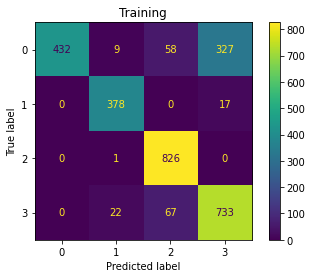

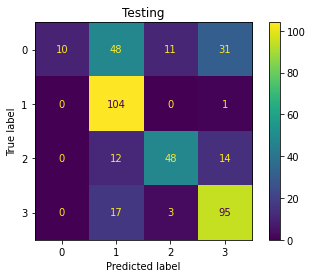

In [ ]:
import sklearn.metrics as metrics
target_names = ["Glioma", "Meningioma", "Healthy", "Pituitary"]
#Classes dict: {'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

# TODO

What went wrong? Why the results for the training set are so different from the testing set?

Finally, prepare the visualization similar to the one below but showing example of incorrectly classified cases. Show next to the given image the real class and the predicted one.

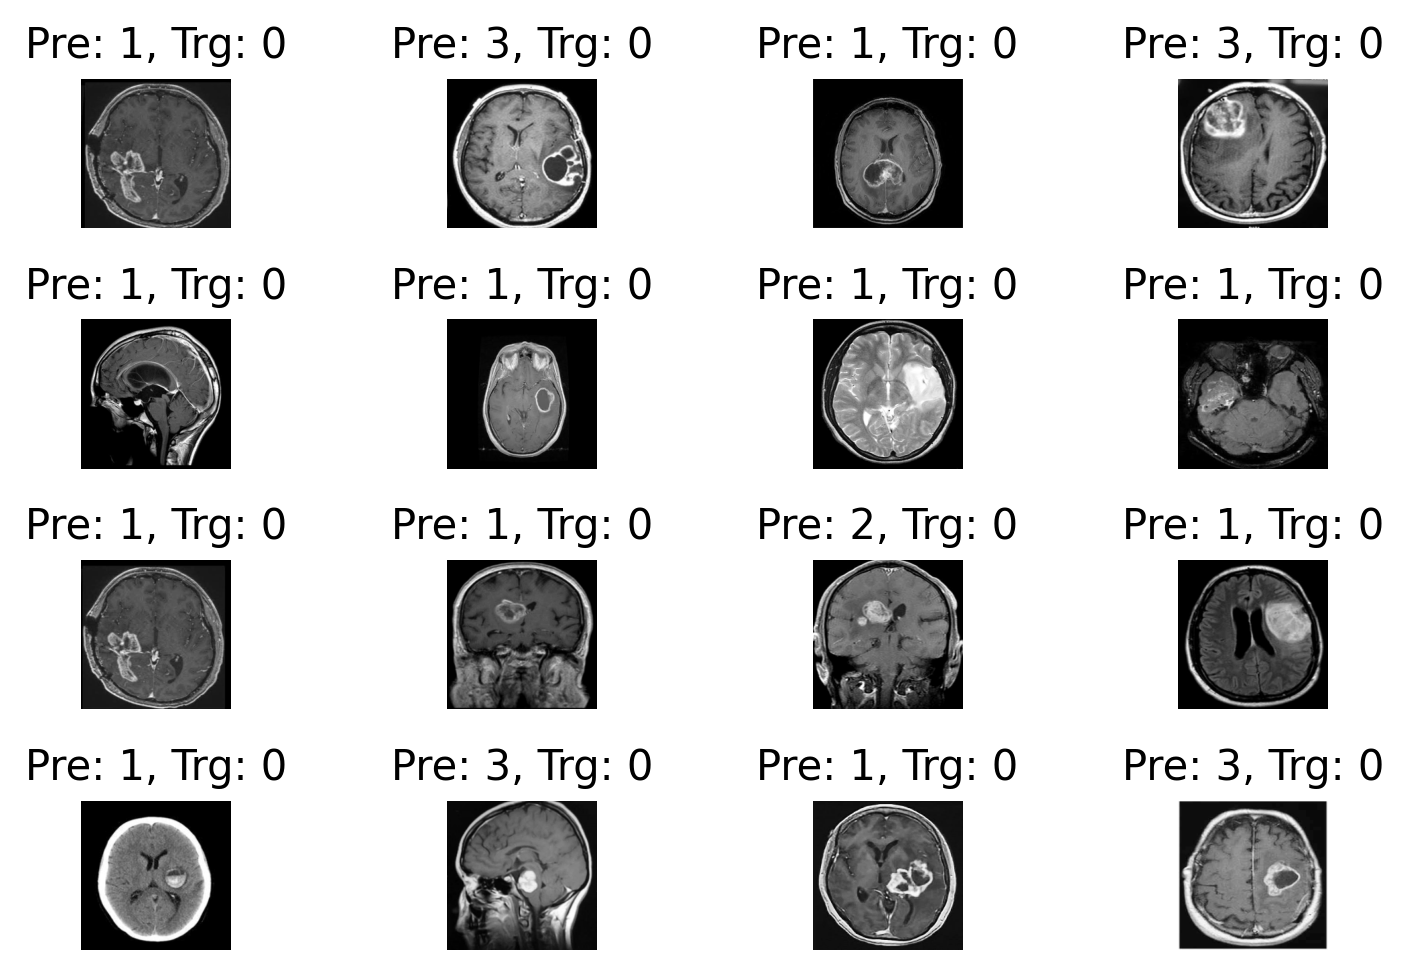

In [ ]:
# TODO: Prepare the visualization as below

# TODO

What can you say about the results using the confusion matrices and the visualization? Is the classification working correctly? What's wrong? Do you have any idea how to improve the results? Hint: visually examine the images for each class, both in the training and the testing set.

We will continue the classification topic during the next laboratory using different dataset and a pretrained ResNet18 architecture.

### Conclusion

Congratulations, you have implemented the gradient descent method, the supervised training pipeline and prepared the training setup for the medical image classification.

After the laboratory you should:
<ul>
  <li> Understand the intuition behind the gradient descent method.
  <li> Be able to implement your own training pipeline for the supervised learning.
  <li> Modify the training hyperparameters to verify their influence on the final results.
</ul>

During the next laboratory you are going to extend the knowledge for classification of XRay images by image augmentation, transfer learning from pretrained ResNet18 network, and logging using TensorBoard. You will also extend the evaluation beyond the confusion matrix and simple visualization.